# Market Basket Analysis


**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset

**About Foodmart**


Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

In this analysis, we will identify products that are frequently bought together.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Loading Customers Dataset**

In [ ]:
customer=pd.read_csv("/content/customer.csv")

In [ ]:
print(customer.shape)
customer.head()


(10281, 15)


,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2
3,4,Burnaby,BC,Canada,92,$10K - $30K,M,4,4,Partial High School,21/05/94,Normal,Skilled Manual,N,2
4,5,Novato,CA,USA,42,$30K - $50K,F,3,0,Partial College,21/08/92,Silver,Manual,N,3


**Loading Products Dataset**

In [ ]:
product=pd.read_csv("/content/product.csv")

In [ ]:
print(product.shape)
product.head()

(1560, 15)


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


**Loading Departments Dataset**

In [ ]:
product_class=pd.read_csv("/content/product_class.csv")

In [ ]:
print(product_class.shape)
product_class.head()

(108, 5)


,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


**Loading Region Dataset**

In [ ]:
region=pd.read_csv("/content/region.csv")

In [ ]:
print(region.shape)
region.head()

(110, 7)


,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,None,None,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118
3,3,Los Angeles,CA,Los Angeles,South West,USA,116
4,4,Guadalajara,Jalisco,Guadalajara,Mexico West,Mexico,114


**Loading Sales Dataset**

In [ ]:
df=pd.read_csv("/content/sales.csv")

In [ ]:
print(df.shape)
df.head()

(269720, 7)


,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


**Loading Stores Dataset**

In [ ]:
store=pd.read_csv("/content/store.csv")

In [ ]:
print(store.shape)
store.head()

(25, 24)


,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,14/6/1959 0:00,19/11/1967 0:00,39696,24390,9184,6122,0,0,1,1,0
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,27/9/1994 0:00,1/12/1995 0:00,23759,16844,4149,2766,1,0,1,1,1


**Loading Time by Day Dataset**

In [ ]:
time_by_day=pd.read_csv("/content/time_by_day.csv")

In [ ]:
time_by_day.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


In [ ]:
time_by_day.tail()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
1456,1457,1999-12-27,Monday,1999,12,27,35059
1457,1458,1999-12-28,Tuesday,1999,12,28,35060
1458,1459,1999-12-29,Wednesday,1999,12,29,35061
1459,1460,1999-12-30,Thursday,1999,12,30,35062
1460,1461,1999-12-31,Friday,1999,12,31,35063


In [ ]:
time_by_day.shape

(1461, 7)

**Merging Customer Dataset in df Dataframe**

In [ ]:
df=df.merge(customer,on='customer_id')

In [ ]:
print(df.shape)
df.head()

(269720, 21)


,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2


**Merging Products Dataset in df Dataframe**

In [ ]:
df=df.merge(product,on='product_id')

In [ ]:
df.shape
df.head()

(269720, 35)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76


**Merging Department Dataset in df Dataframe**

In [ ]:
df=df.merge(product_class,on='product_class_id')

In [ ]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food


In [ ]:
df.shape
df.head()

(269720, 39)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food


**Merging Stores Dataset in df Dataframe**

In [ ]:
df=df.merge(store,on='store_id')

In [ ]:
df.shape
df.head()

(269720, 62)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
2,337,742,307,2,2.25,0.7425,3,Sedro Woolley,WA,USA,80,$130K - $150K,F,5,0,Bachelors Degree,12/01/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
4,963,952,5121,2,2.40,1.1040,1,Bellingham,WA,USA,78,$30K - $50K,M,2,0,Partial College,12/04/93,Bronze,Clerical,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0


**Merging Region Dataset in df Dataframe**

In [ ]:
df=df.merge(region,on='region_id')

In [ ]:
df.shape
df.head()

(269720, 68)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
2,337,742,307,2,2.25,0.7425,3,Sedro Woolley,WA,USA,80,$130K - $150K,F,5,0,Bachelors Degree,12/01/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
3,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
4,963,952,5121,2,2.40,1.1040,1,Bellingham,WA,USA,78,$30K - $50K,M,2,0,Partial College,12/04/93,Bronze,Clerical,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111


**Merging Time by Day Dataset in df Dataframe**

In [ ]:
df=df.merge(time_by_day,on='time_id')

In [ ]:
df.shape
df.head()

(269720, 74)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


**Converting Dataframe to Final Foodmart Offline Dataset**

In [ ]:
df.to_csv("/content/Foodmart_dataset.csv")

# Exploratory Data Analysis (EDA)

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import squarify
!pip install squarify
import squarify

import networkx as nx
import warnings
import matplotlib as mpl
!pip install gapminder
import gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Loading Foodmart Offline Dataset**

In [ ]:
df=pd.read_csv("/content/Foodmart_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Size of Foodmart Dataset**

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(269720, 75)

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


# Data Exploration

**Describe**

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.00000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,134859.50000,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,77861.60164,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,0.00000,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,67429.75000,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,134859.50000,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,202289.25000,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,269719.00000,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


In [ ]:
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
count,269720.00000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720,269720,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720.000000,269720,269720,269720,269720.0,269720,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,12,3,NaN,8,2,NaN,NaN,5,1633,4,5,2,NaN,NaN,111,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,45,22,3,5,NaN,24,NaN,24,23,10,NaN,3,22,24,24,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,10,21,7,3,NaN,673,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo,WA,USA,NaN,$30K - $50K,F,NaN,NaN,Partial High School,16/10/93,Bronze,Professional,Y,NaN,NaN,Hermanos,Moms Roasted Chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,NaN,Store 13,NaN,5179 Valley Ave,Salem,WA,NaN,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salem,WA,Los Angeles,North West,USA,NaN,1998-12-07,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,86855,180823,NaN,88422,136181,NaN,NaN,81536,954,151261,87867,163137,NaN,NaN,8071,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20859,32919,38041,193728,118341,NaN,25865,NaN,25865,25865,86855,NaN,180823,25865,25865,25865,25865,25865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25865,86855,31501,130006,180823,NaN,1377,40685,NaN,NaN,NaN,NaN
mean,134859.50000,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,NaN,NaN,NaN,57.723454,NaN,NaN,2.535351,0.816091,NaN,NaN,NaN,NaN,NaN,2.205632,54.382471,NaN,NaN,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,NaN,NaN,NaN,NaN,NaN,39.894947,NaN,12.753730,NaN,NaN,NaN,55555.0,NaN,NaN,NaN,NaN,NaN,NaN,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,NaN,NaN,NaN,NaN,NaN,120.811319,NaN,NaN,1997.678048,6.661100,15.109970,34402.004990
std,77861.60164,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,NaN,NaN,NaN,29.973844,NaN,NaN,1.490679,1.292423,NaN,NaN,NaN,NaN,NaN,1.111834,30.846176,NaN,NaN,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,NaN,NaN,NaN,NaN,NaN,32.813184,NaN,6.349746,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,NaN,NaN,NaN,NaN,NaN,6.222520,NaN,NaN,0.467226,3.514326,8.319021,201.955563
min,0.00000,1.000000,367.000000,3.00

**Missing Values**

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

**Datatypes**

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

**Checking Datatypes, Mising Value, Unique Value**

In [ ]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
temp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,data_type,null_count,unique_count
Unnamed: 0,int64,0,269720
product_id,int64,0,1559
time_id,int64,0,673
customer_id,int64,0,8842
store_id,int64,0,24
store_sales,float64,0,1069
store_cost,float64,0,12535
unit_sales,int64,0,6
city,object,0,107
state_province,object,0,12


# Univariate Analysis

**Histograms**

**Frequency Plot Of Department Id**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'department id')

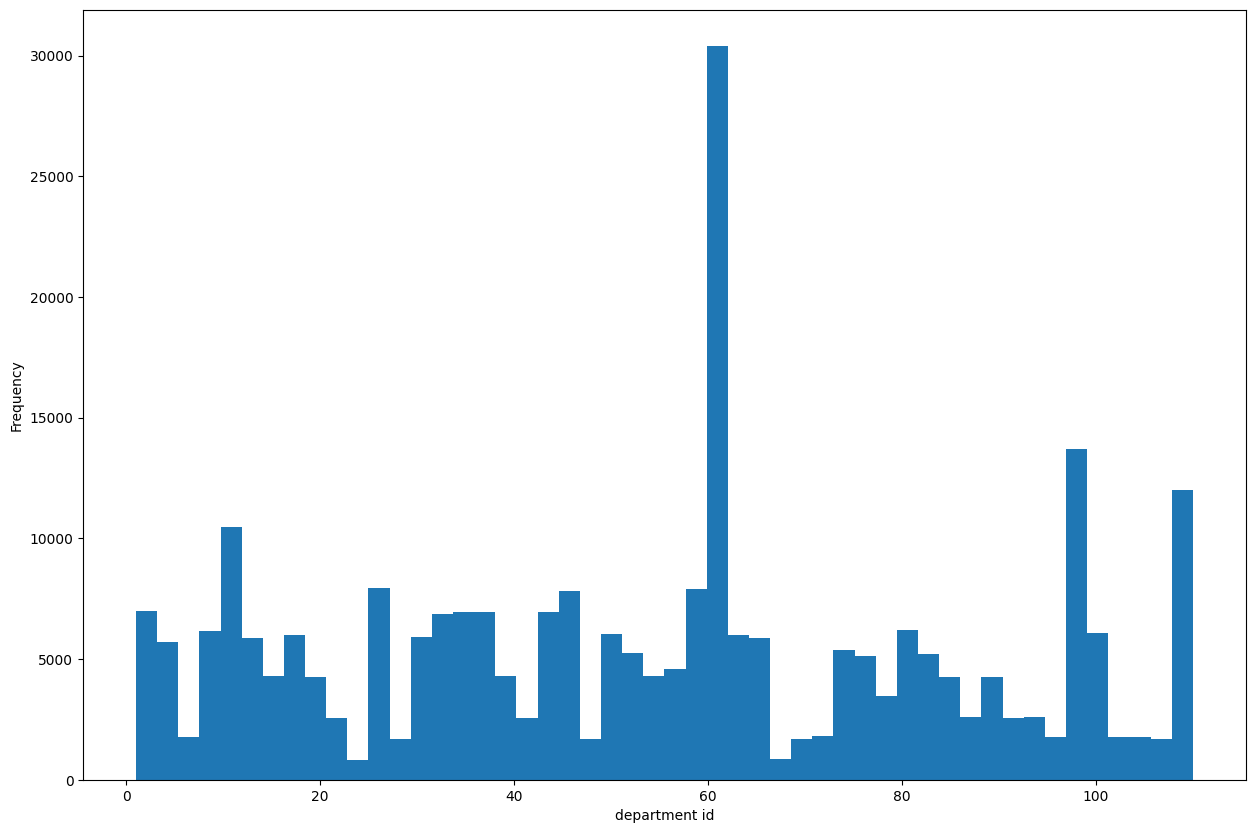

In [ ]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id')

**Frequency Plot Of Product Id**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'product id')

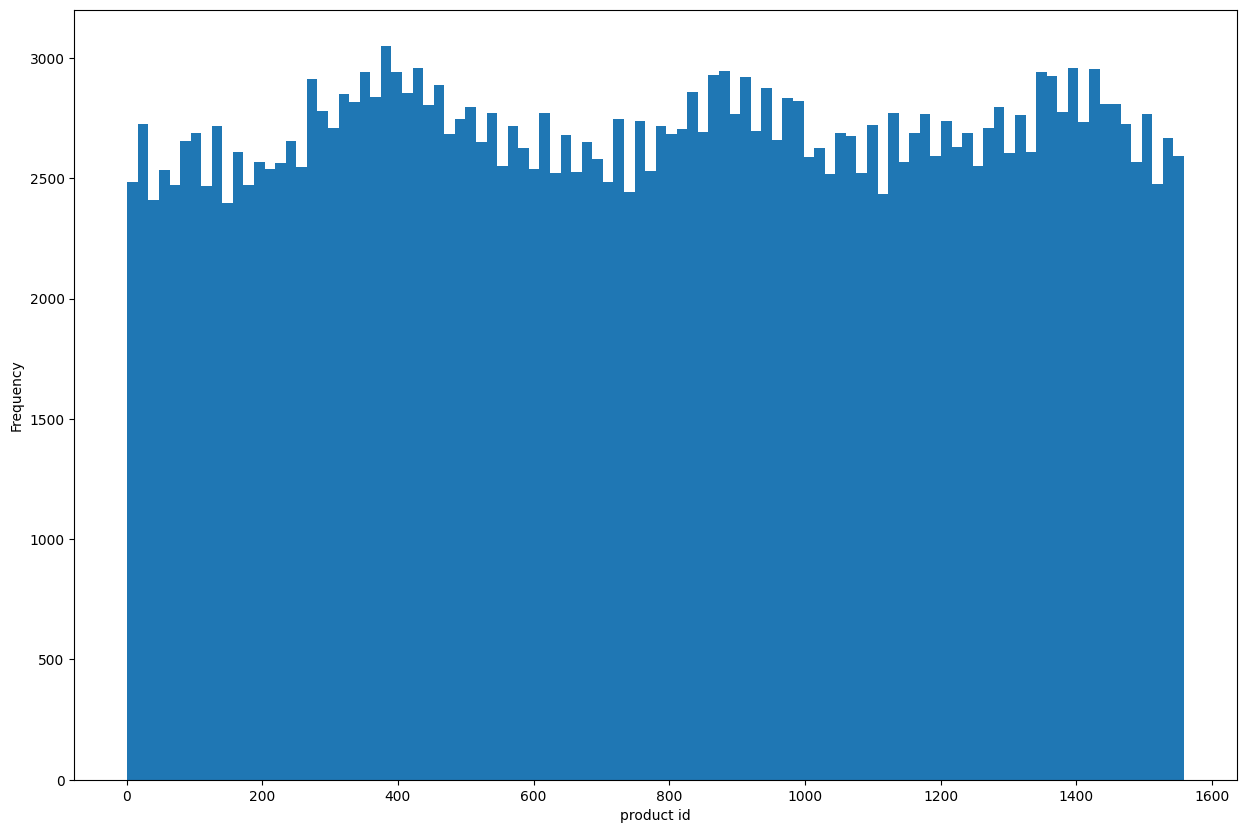

In [ ]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

**Frequency Plot Of Unit Sales**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Unit Sales')

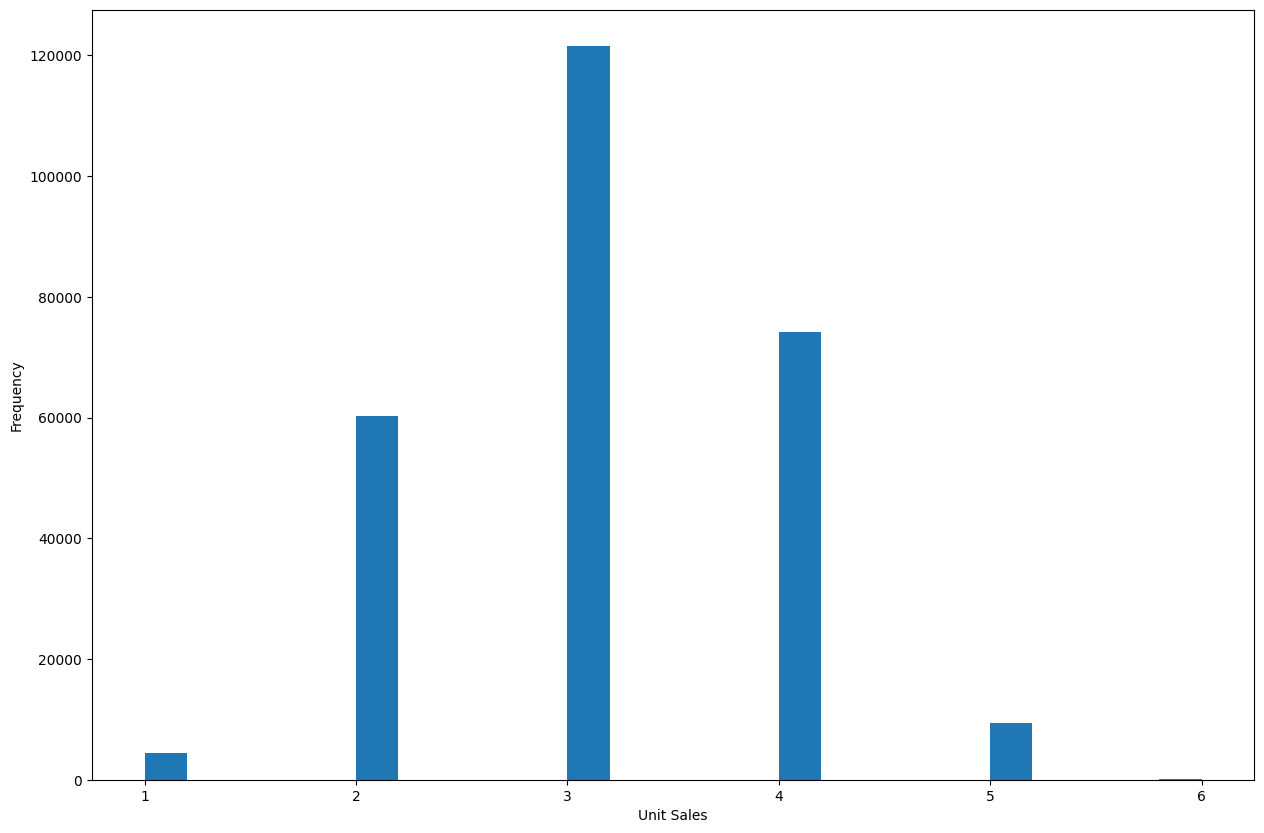

In [ ]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales')

**When do people order**

**Year**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'year')

([<matplotlib.axis.XTick at 0x7caf16dc0ee0>,
 [Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999')])

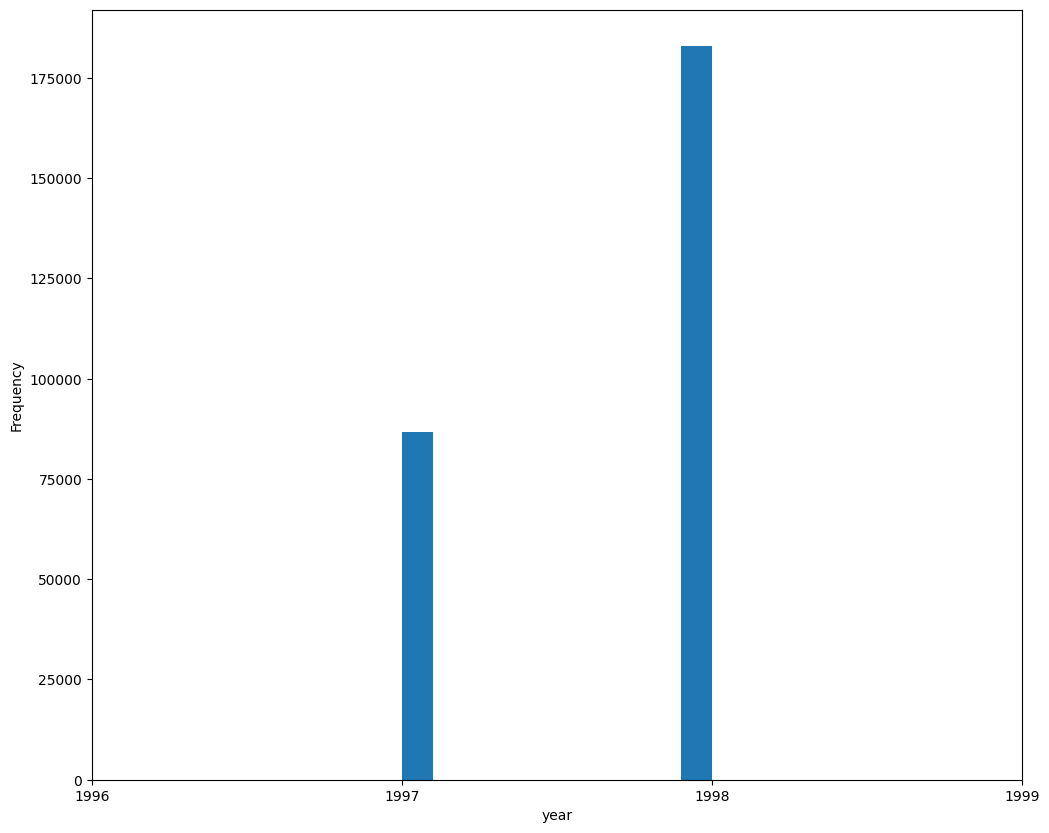

In [ ]:
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])

**Month**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Month')

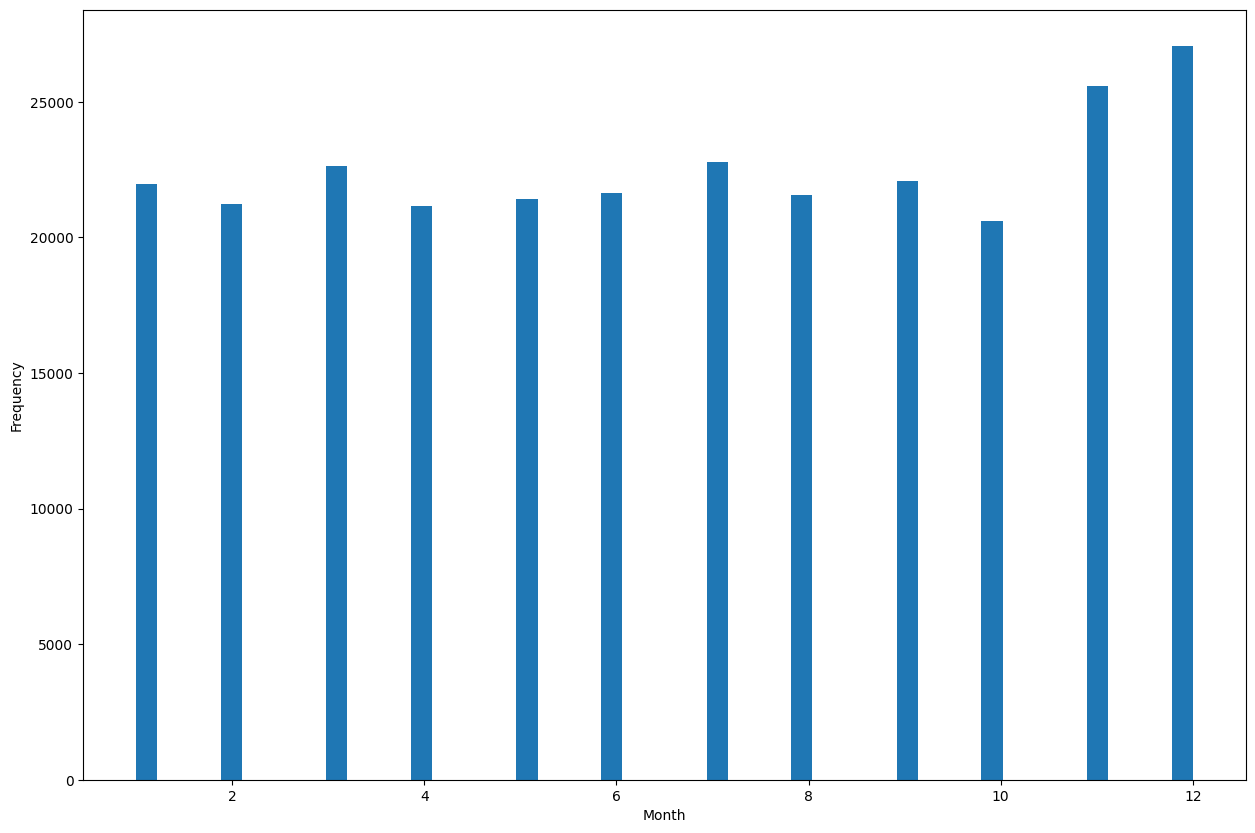

In [ ]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

**Day Of Month**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Day of month')

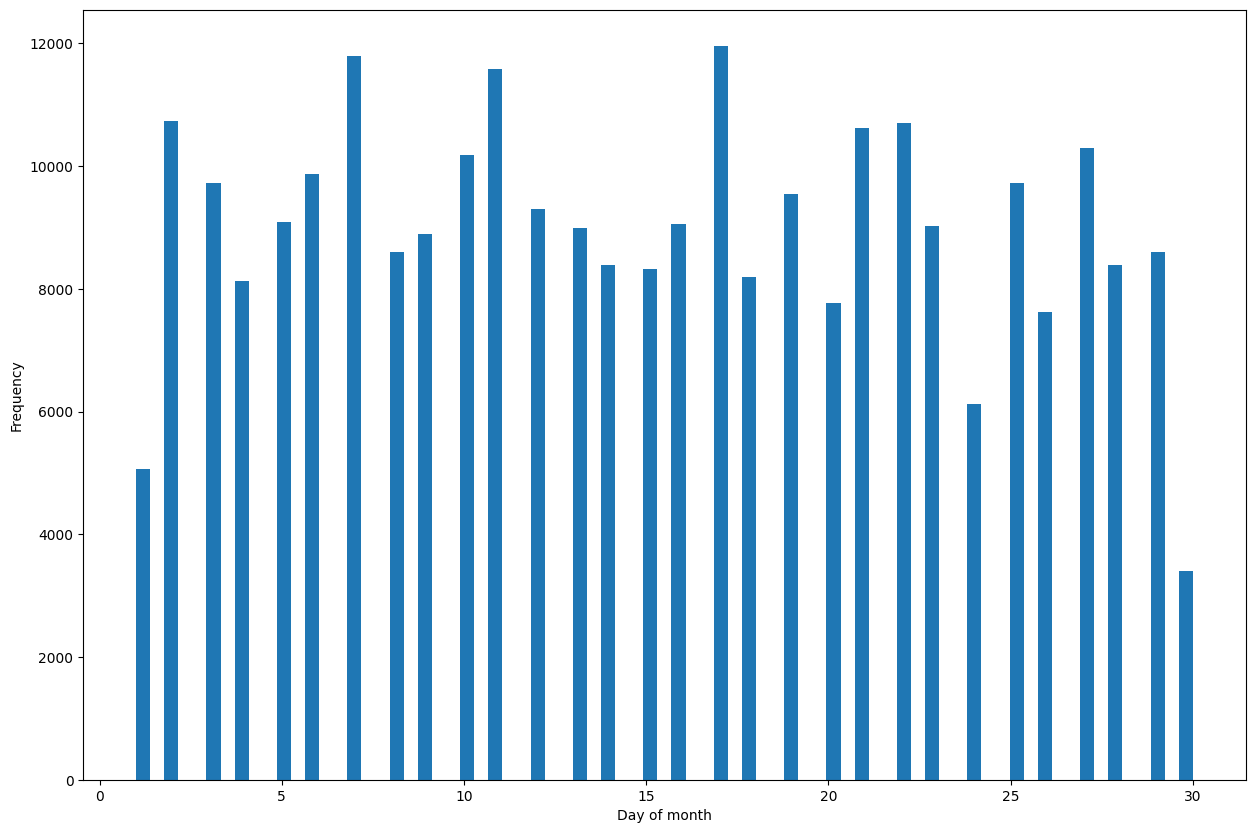

In [ ]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

**Day Of Week**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

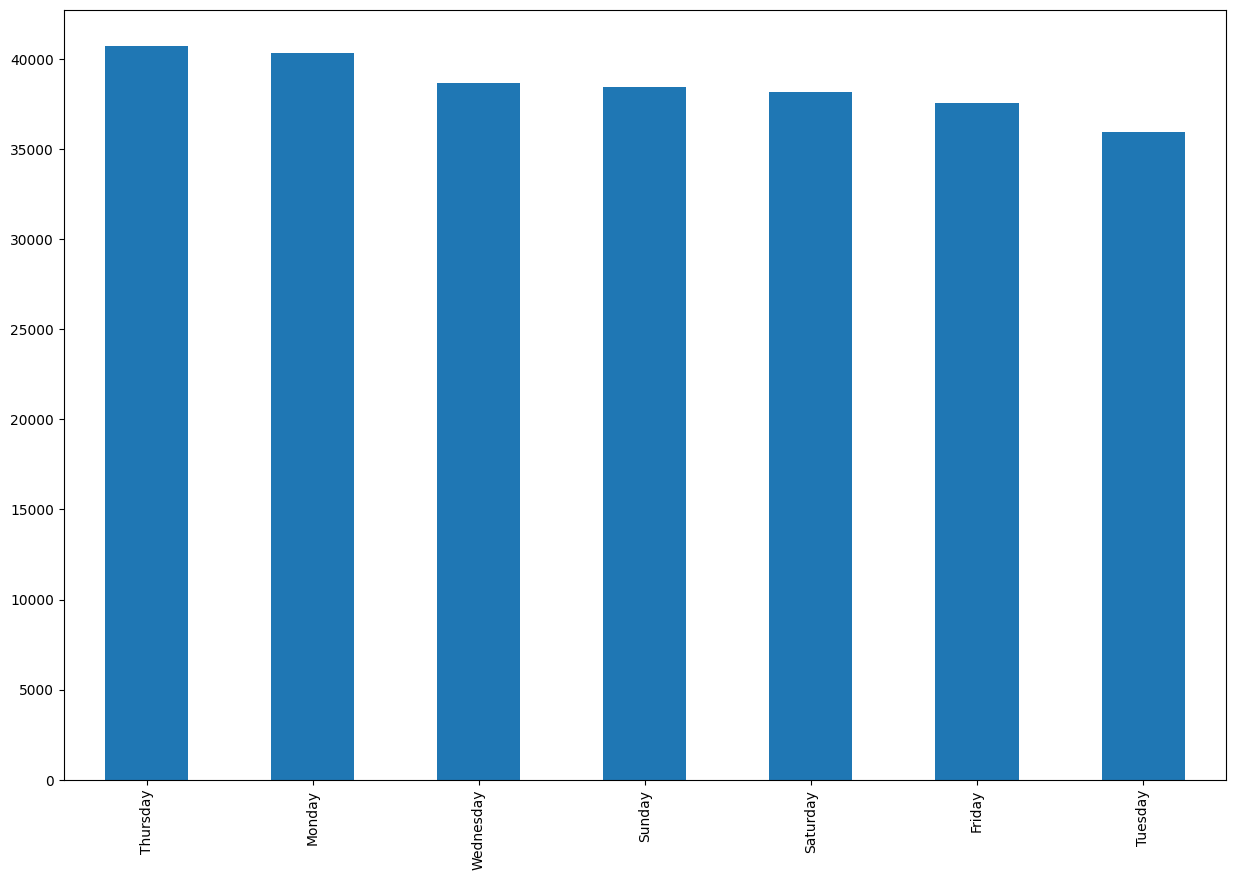

In [ ]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar()

### Top choices

**Top 10 First Choices in Products**

In [ ]:
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

#products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df.shape)
products.shape

(269720, 76)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11, 76)

In [ ]:
products['product_name']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


605                       CDR Oregano
606               Fantastic Rye Bread
607                  Colony Rye Bread
608                  Sphinx Rye Bread
609              Moms Roasted Chicken
610          American Roasted Chicken
611    Blue Label Large Canned Shrimp
612    Blue Label Large Canned Shrimp
613                   Good Light Beer
614        Steady Whitening Toothpast
615                 Hilltop Deodorant
Name: product_name, dtype: object

In [ ]:
display(products)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show()

NameError: ignored

**Top 10 First Choices in Department**

In [ ]:
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

{'Departments': Text(0.006102028005287145, -0.0019428984734435825, 'Departments'),
 'Produce': Text(-0.4914795571286396, -0.848581687733592, 'Produce'),
 'Household': Text(-0.03081959637508621, 0.9803615174808561, 'Household'),
 'Dairy': Text(-0.941891066886548, 0.4591360621676559, 'Dairy'),
 'Snack Foods': Text(1.0, 0.02215067237340814, 'Snack Foods'),
 'Health and Hygiene': Text(0.5104911302539863, -0.8513281562737315, 'Health and Hygiene'),
 'Eggs': Text(-0.9259869512398129, -0.48961982027789563, 'Eggs'),
 'Canned Foods': Text(-0.5223721224761864, 0.821275231056302, 'Canned Foods'),
 'Beverages': Text(0.8451430438750607, 0.5157022252635822, 'Beverages'),
 'Frozen Foods': Text(0.8556714051873451, -0.4744733822380352, 'Frozen Foods'),
 'Deli': Text(-0.785074875359058, -0.018114587978377703, 'Deli'),
 'Canned Products': Text(0.01032192617854852, -0.9805841206054171, 'Canned Products'),
 'Periodicals': Text(0.4698946359651036, 0.8660189452386878, 'Periodicals')}

(-1.1457896289096354,
 1.2038985620230875,
 -1.1864834126044759,
 1.1862608094799147)

Text(0.5, 1.0, 'Top 10 First Choices in Departments')

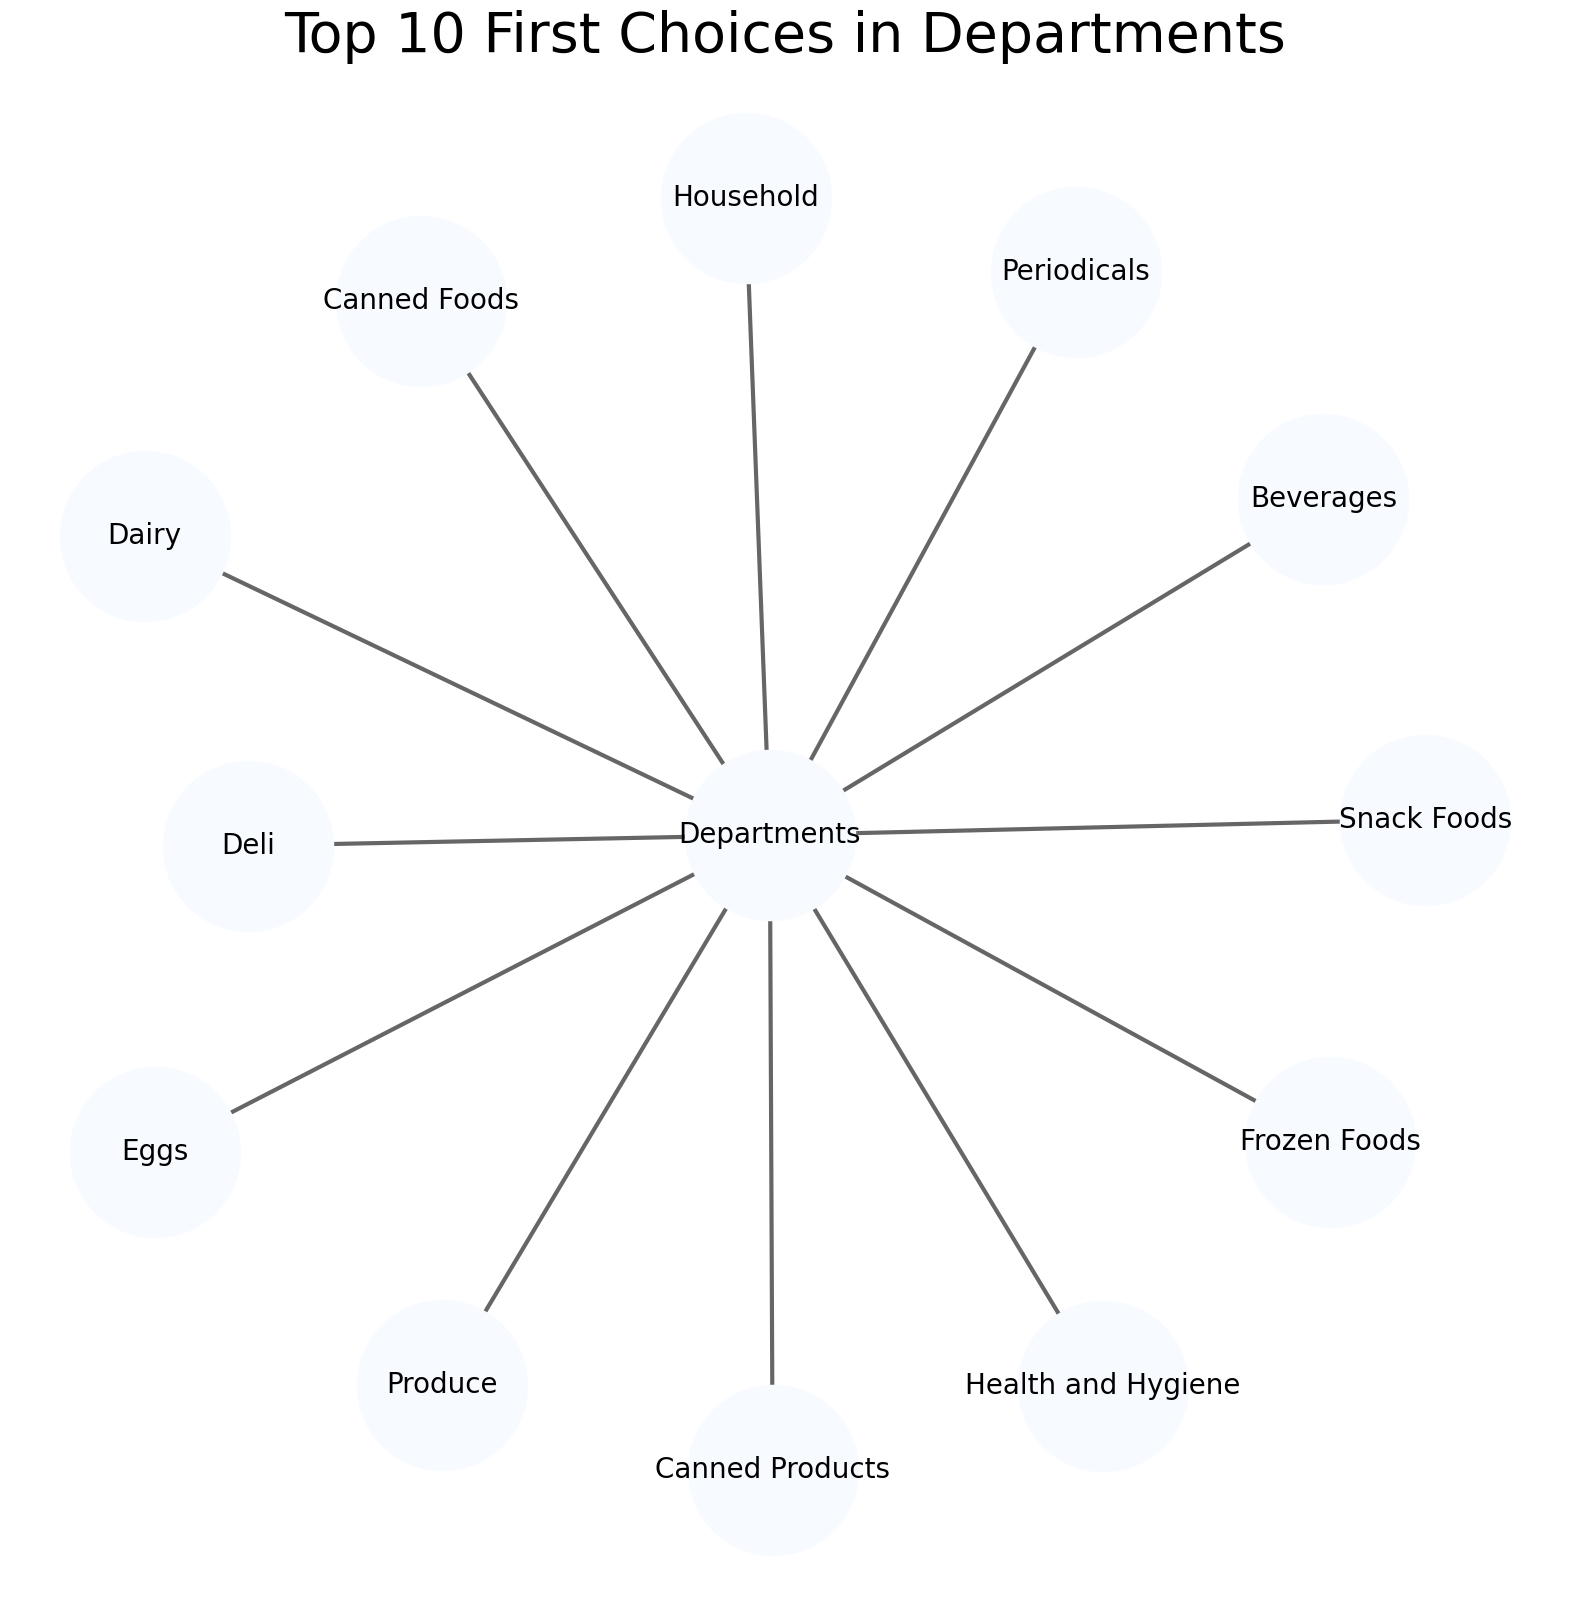

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show()

**Highest Ordered**

**Most Ordered Products**

In [ ]:
df['product_name'].value_counts()

Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Steady Childrens Cold Remedy                   214
Nationeel Dried Apples                         214
Sunset Economy Toilet Brush                    213
Hilltop Mint Mouthwash                         213
Ebony Mixed Nuts                               213
Special Wheat Puffs                            212
Ebony Fresh Lima Beans                         211
BBB Best French Roast Coffee                   208
Hermanos Potatos                               208
Red Wing Glass Cleaner                         208
Better Chicken Noodle Soup                     207
BBB Best Apple Butter                          207
Great Pumpernickel Bread                       207
Big Time Orange Popsicles                      207
Great English Muffins                          207
Hermanos Green Pepper          

**Most Ordered Products in Percentage**

In [ ]:
df['product_name'].value_counts()/len(df)*100

Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Steady Childrens Cold Remedy                   0.079342
Nationeel Dried Apples                         0.079342
Sunset Economy Toilet Brush                    0.078971
Hilltop Mint Mouthwash                         0.078971
Ebony Mixed Nuts                               0.078971
Special Wheat Puffs                            0.078600
Ebony Fresh Lima Beans                         0.078229
BBB Best French Roast Coffee                   0.077117
Hermanos Potatos                               0.077117
Red Wing Glass Cleaner                         0.077117
Better Chicken Noodle Soup                     0.076746
BBB Best Apple Butter                          0.076746
Great Pumpernickel Bread                       0.076746
Big Time Orange Popsicles                      0

**Most Visited Departments**

In [ ]:
df['department'].value_counts()

Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64

**Most Visited Departments in Percentage**

In [ ]:
df['department'].value_counts()/len(df)*100

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

**Most Visited Aisle**

In [ ]:
df['subcategory'].value_counts()

Fresh Vegetables      20859
Fresh Fruit           11972
Soup                   7919
Cheese                 7815
Dried Fruit            7758
Cookies                6930
Wine                   5189
Paper Wipes            5128
Canned Vegetables      5092
Frozen Vegetables      4435
Nuts                   4345
Chocolate Candy        4341
Milk                   4250
Preserves              4237
Chips                  4176
Eggs                   4099
Lightbulbs             3609
Sliced Bread           3586
Muffins                3517
Dips                   3506
Waffles                3501
Pizza                  3481
Cereal                 3462
Cooking Oil            3455
Personal Hygiene       3454
Deli Meats             3435
Batteries              3435
Juice                  3429
Popsicles              3393
Coffee                 3387
Soda                   3367
Pasta                  3148
Ice Cream              2736
Peanut Butter          2660
TV Dinner              2643
Deli Salads         

**Most Visited Aisle in Percentage**

In [ ]:
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Deli Meats            1.273543
Batteries             1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167136
Ice Crea

**BarPlot**

**BarPlot of Most Visied Aisle**

<Axes: >

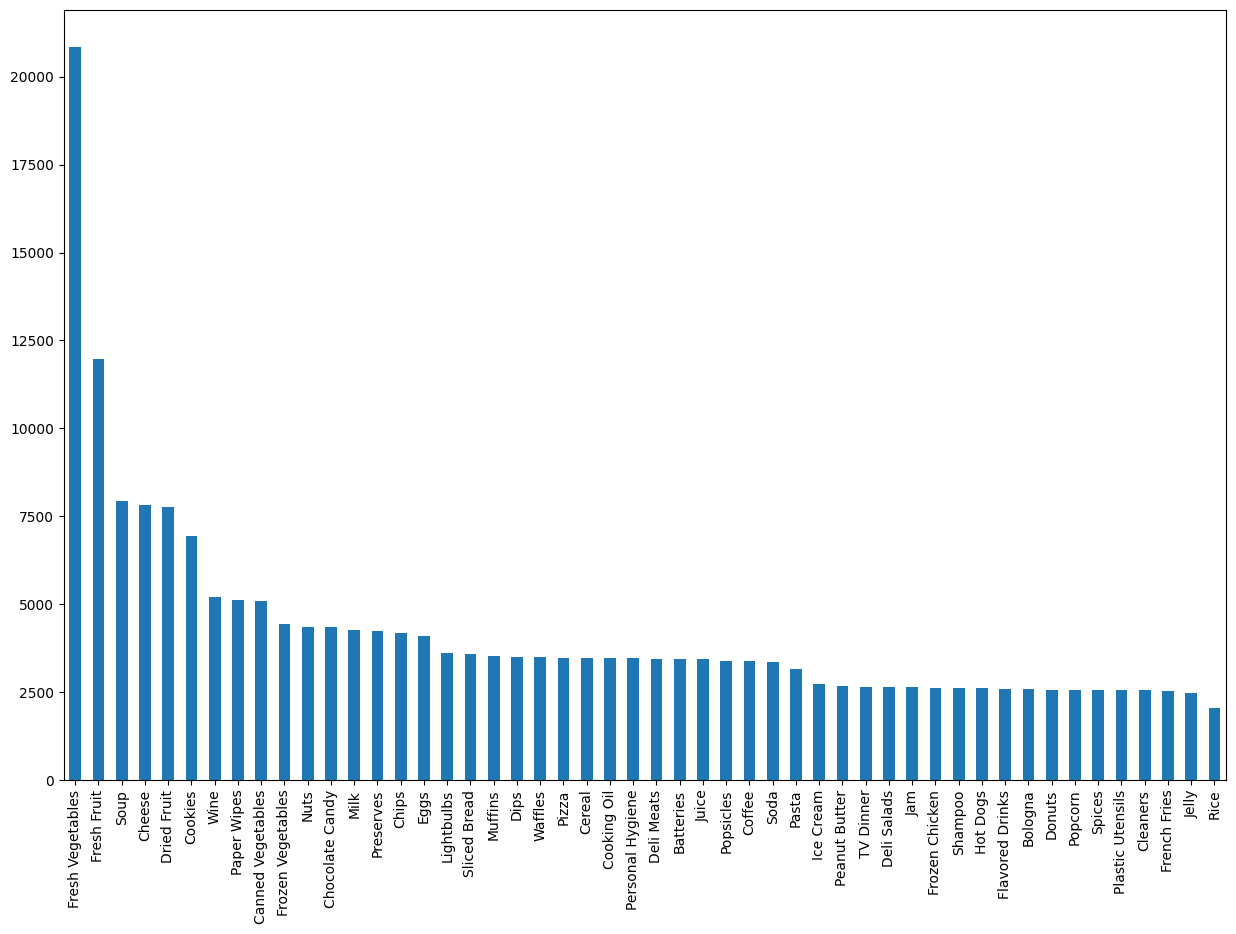

In [ ]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

**BarPlot of Most Visited Department**

<Axes: >

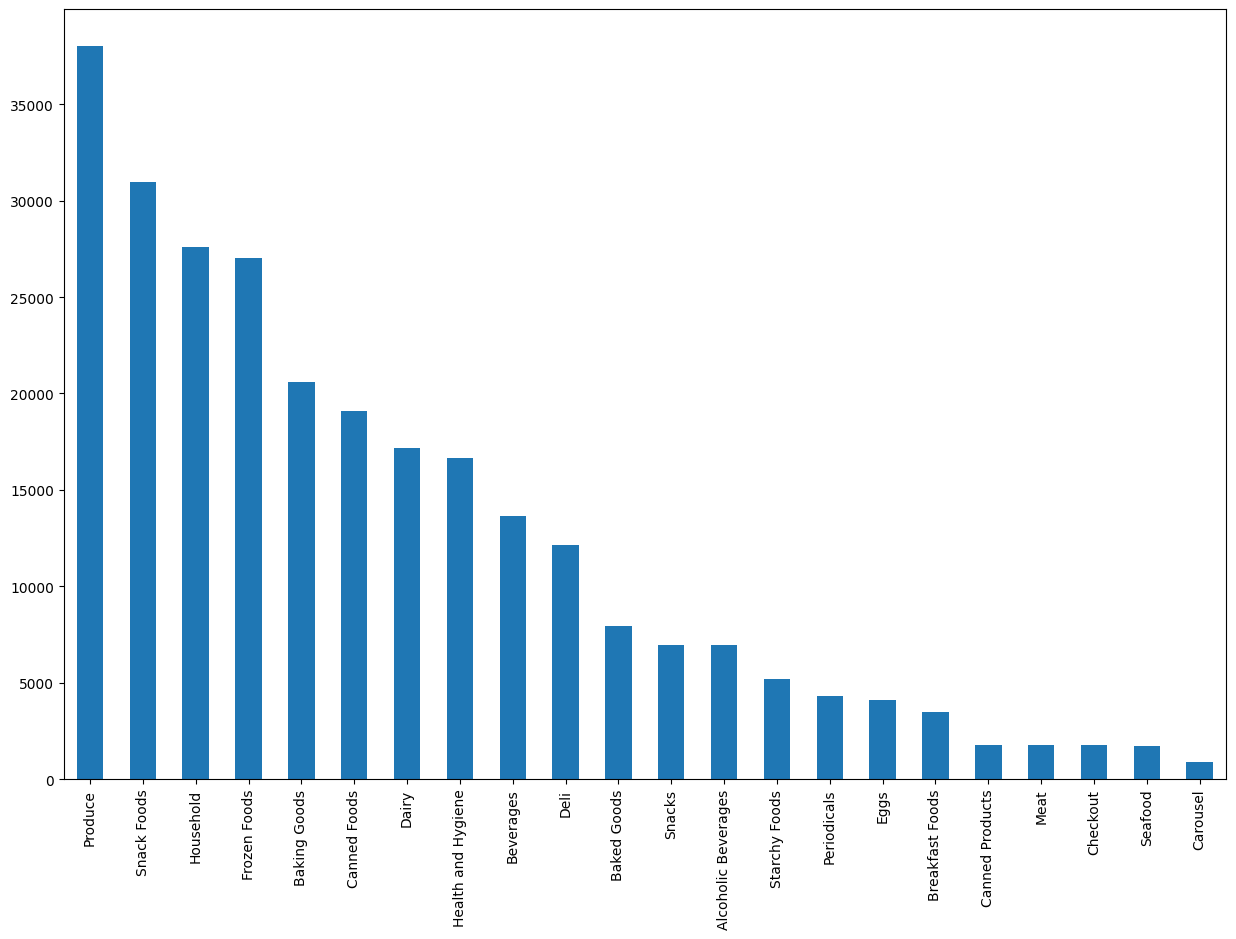

In [ ]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

**BarPlot of Most Bought Product**

<Axes: >

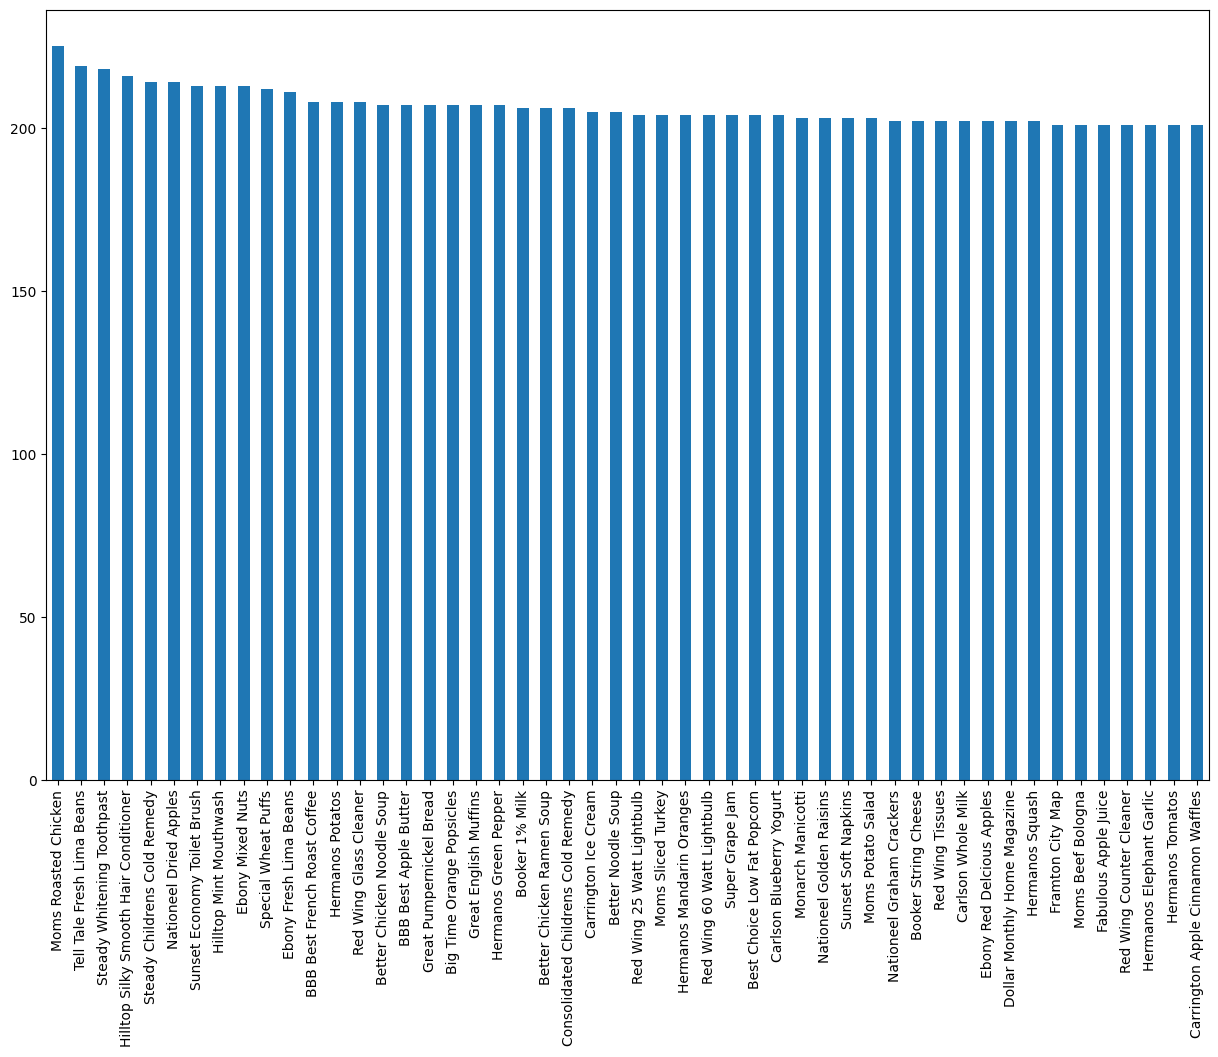

In [ ]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar()

**Array of Most Bought Product**

In [ ]:
y=df_freq_products.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Sunset Economy Toilet Brush', 'Hilltop Mint Mouthwash',
       'Ebony Mixed Nuts', 'Special Wheat Puffs', 'Ebony Fresh Lima Beans',
       'BBB Best French Roast Coffee', 'Hermanos Potatos',
       'Red Wing Glass Cleaner', 'Better Chicken Noodle Soup',
       'BBB Best Apple Butter', 'Great Pumpernickel Bread',
       'Big Time Orange Popsicles', 'Great English Muffins',
       'Hermanos Green Pepper', 'Booker 1% Milk', 'Better Chicken Ramen Soup',
       'Consolidated Childrens Cold Remedy', 'Carrington Ice Cream',
       'Better Noodle Soup', 'Red Wing 25 Watt Lightbulb',
       'Moms Sliced Turkey', 'Hermanos Mandarin Oranges',
       'Red Wing 60 Watt Lightbulb', 'Super Grape Jam',
       'Best Choice Low Fat Popcorn', 'Carlson Blueberry Yogurt',
       'Monarch Manicotti'

**TreeMap for Most Bought Products**

<Axes: >

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

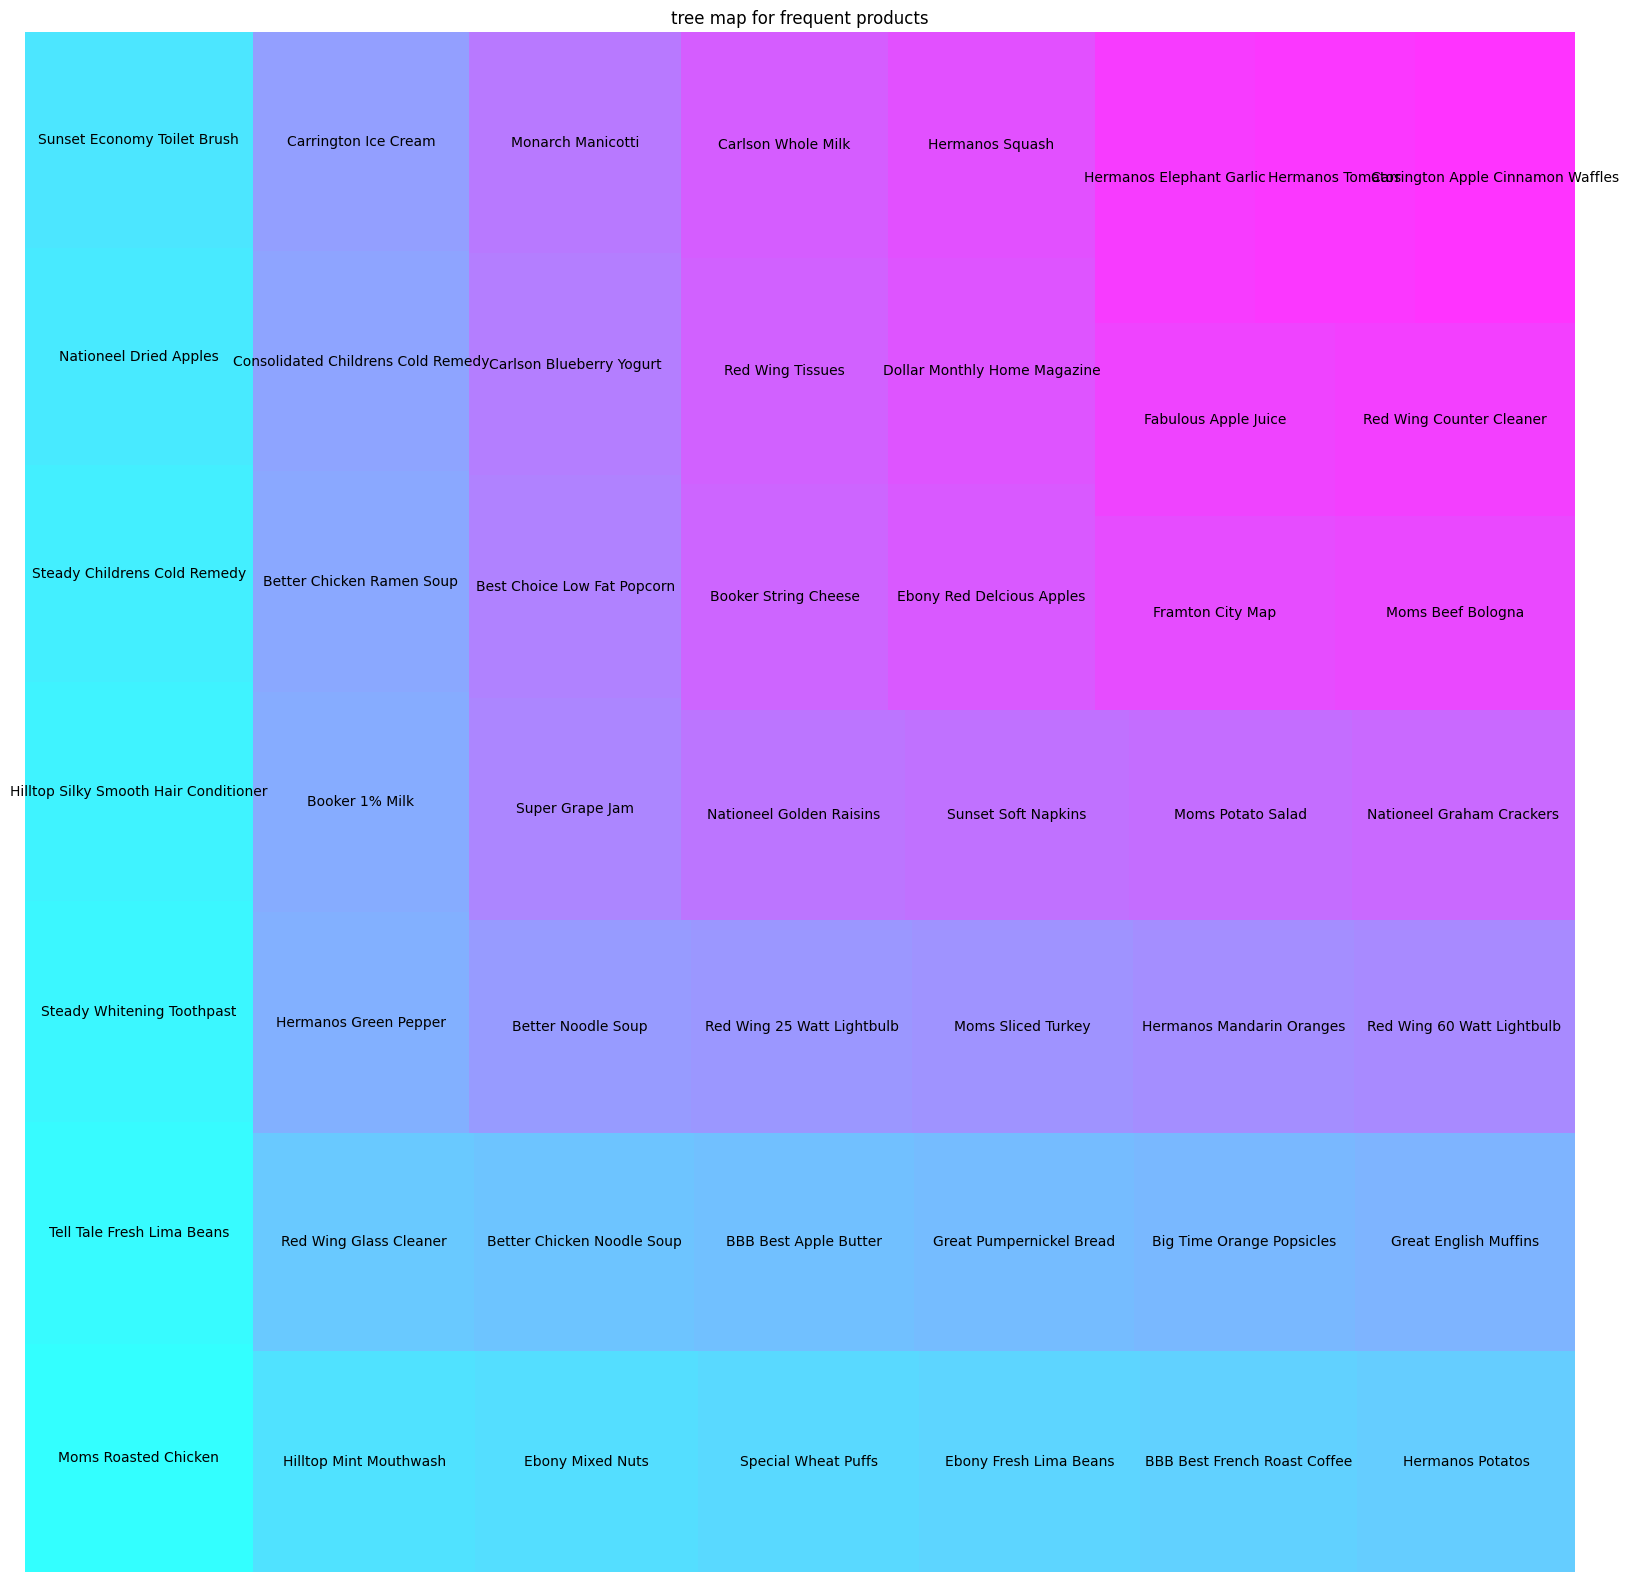

In [ ]:
plt.rcParams['figure.figsize']=(20,20)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Data Manipulation

In [ ]:
df.shape

(269720, 77)

**Drop Duplicates**

In [ ]:
df.drop_duplicates()

In [ ]:
df.shape

(269720, 77)

**Missing Values**

In [ ]:
df.isnull().sum()

Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

**Datatypes**

In [ ]:
df.dtypes

Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

# Bivariate Analysis

**Bar Plot**

**Bar Plot between customers and their products per order**

In [ ]:
data_user_orders_num=df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


customer_id
3        30
5         1
6        16
8        42
9        13
         ..
10275    22
10277    26
10278    28
10280    40
10281    22
Name: unit_sales, Length: 8842, dtype: int64

In [ ]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])

source_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

<BarContainer object of 10 artists>

Text(0.5, 0, 'Unit sales')

Text(0, 0.5, 'No. of customers')

Text(0.5, 1.0, 'Orders Scatter Plot')

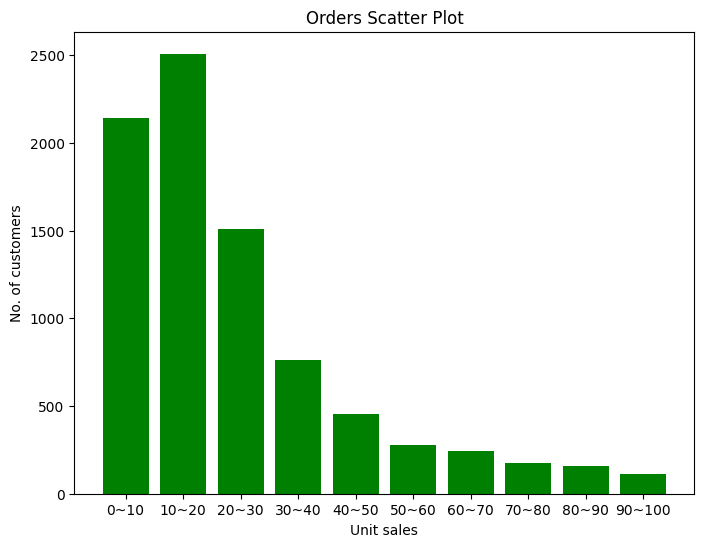

In [ ]:
font_size=10
fig_size=(8,6)
mpl.rcParams['font.size']=font_size
mpl.rcParams['figure.figsize']=fig_size
bar_width=0.3


x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
#assign color
plt.bar(x_axis, y_axis, color='g')
# descrpitions for x-axis, y-axis
plt.xlabel('Unit sales')
plt.ylabel("No. of customers")
plt.title("Orders Scatter Plot")
plt.show()

**Transaction ID** - create transaction id which denotes a basket

In [ ]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,...,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,transaction_id
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,...,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,6280371
1,1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,...,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,4018371
2,2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,...,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,6280371
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,...,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,4018371
4,4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,...,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,4382371


In [ ]:
df.iloc[:,[4, 0,3]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,store_id,Unnamed: 0,customer_id
0,2,0,6280
1,2,1,4018
2,2,2,6280
3,2,3,4018
4,2,4,4382
...,...,...,...
269715,20,269715,433
269716,20,269716,6094
269717,20,269717,5352
269718,20,269718,3332


**Filtering out Columns**

In [ ]:
cols = [75,3,1,24]
order_products=df[df.columns[cols]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
order_products.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,customer_id,product_id,product_name
0,6280371,6280,337,Better Turkey Noodle Soup
1,4018371,4018,963,Just Right Chicken Noodle Soup
2,6280371,6280,1512,Jardon Spaghetti
3,4018371,4018,181,High Top Lettuce
4,4382371,4382,483,Tell Tale Corn on the Cob


**Average products bought by customers per order**

In [ ]:
data_user_products_num1=order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1=pd.DataFrame(data_user_products_num1)
data_user_products_num1['transaction_id']=list(data_user_products_num1.index)
data_user_products_num1.columns=['product_num','orderid']
data_user_products_num2=pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

data_user_products_num3=data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg']=data_user_products_num3['sum']/data_user_products_num3['count']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_user_products_num3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum,count,avg
customer_id,,,
3,186,30,6.200000
5,1,1,1.000000
6,72,16,4.500000
8,208,42,4.952381
9,85,13,6.538462


# Featured Products Department Wise

In [ ]:
cols = [1,36,38,24]
departments=df[df.columns[cols]]
departments.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,subcategory,department,product_name
0,337,Soup,Canned Foods,Better Turkey Noodle Soup
1,963,Soup,Canned Foods,Just Right Chicken Noodle Soup
2,1512,Pasta,Starchy Foods,Jardon Spaghetti
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob


**List Of Departments**

In [ ]:
temp=['department']
for i in temp:
    print('@@@@@@Value Count in',i,'@@@@@@@@@')
    print(df[i].value_counts())

@@@@@@Value Count in department @@@@@@@@@
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64


**Produce Department**

In [ ]:
produce=departments.loc[df['department'] == 'Produce']
produce.head()

,product_id,subcategory,department,product_name
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob
18,1123,Fresh Vegetables,Produce,Tri-State Potatos
19,804,Fresh Vegetables,Produce,Ebony Elephant Garlic
20,1426,Fresh Vegetables,Produce,Hermanos Prepared Salad


**Featured Products in Produce Department**

In [ ]:
top_produce=produce['product_name'].value_counts().iloc[:10]
top_produce.head()

Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: product_name, dtype: int64

**Featured Products in Snack Foods Department**

In [ ]:
snacks=df.loc[df['department']=='Snack Foods']
top_snacks=snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Nationeel Avocado Dip          198
Name: product_name, dtype: int64

**Featured Products in HouseHold Department**

In [ ]:
household=df.loc[df['department']=='Household']
top_household=household['product_name'].value_counts().iloc[:10]
print(top_household)

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 60 Watt Lightbulb     204
Red Wing 25 Watt Lightbulb     204
Sunset Soft Napkins            203
Red Wing Tissues               202
Sunset Paper Cups              201
Red Wing Counter Cleaner       201
Denny 60 Watt Lightbulb        200
Sunset Large Sponge            199
Name: product_name, dtype: int64


**Featured Products in Frozen Foods Department**

In [ ]:
frozen=df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Big Time Chicken TV Dinner           201
Carrington Apple Cinnamon Waffles    201
Carrington Beef TV Dinner            200
Big Time Frozen Broccoli             200
Big Time Pancake Mix                 200
Big Time Frozen Cheese Pizza         199
Carrington Ice Cream Sandwich        198
Carrington Blueberry Waffles         197
Name: product_name, dtype: int64


**Featured Products in Baking Goods Department**

In [ ]:
baking=df.loc[df['department']=='Baking Goods']
top_baking=baking['product_name'].value_counts().iloc[:10]
print(top_baking)

BBB Best Apple Butter               207
Super Grape Jam                     204
BBB Best Strawberry Jelly           198
Landslide Strawberry Jam            198
Super Strawberry Jelly              197
Super Chunky Peanut Butter          197
Super Creamy Peanut Butter          197
Super Extra Chunky Peanut Butter    195
BBB Best Apple Preserves            192
Super Salt                          191
Name: product_name, dtype: int64


**Featured Products in Canned Foods Department**

In [ ]:
canned=df.loc[df['department']=='Canned Foods']
top_canned=canned['product_name'].value_counts().iloc[:10]
print(top_canned)

Better Chicken Noodle Soup       207
Better Chicken Ramen Soup        206
Better Noodle Soup               205
Better Fancy Canned Clams        199
Better Canned Tuna in Oil        198
Better Fancy Canned Anchovies    198
Just Right Turkey Noodle Soup    197
Just Right Chicken Ramen Soup    197
Just Right Rice Soup             196
Better Canned Tuna in Water      195
Name: product_name, dtype: int64


**Featured Products in Dairy Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Dairy'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Booker 1% Milk                   206
Carlson Blueberry Yogurt         204
Booker String Cheese             202
Carlson Whole Milk               202
Carlson Head Cheese              201
Carlson Low Fat String Cheese    199
Carlson Buttermilk               199
Carlson Jack Cheese              198
Carlson Havarti Cheese           197
Carlson 1% Milk                  196
Name: product_name, dtype: int64


**Featured Products in Health and Hygiene Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Health and Hygiene'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Hilltop Mint Mouthwash                   213
Consolidated Childrens Cold Remedy       206
Steady 200 MG Ibuprofen                  200
Bird Call 200 MG Acetominifen            198
Steady 200 MG Acetominifen               198
Hilltop Deodorant                        197
Hilltop Extra Moisture Shampoo           197
Name: product_name, dtype: int64


**Featured Products in Beverages Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

BBB Best French Roast Coffee    208
Fabulous Apple Juice            201
Fabulous Orange Juice           200
Fabulous Cranberry Juice        199
Skinner Strawberry Drink        198
Excellent Mango Drink           195
Token Diet Cola                 195
BBB Best Decaf Coffee           195
Excellent Cream Soda            192
Fabulous Strawberry Drink       191
Name: product_name, dtype: int64


**Featured Products in Deli Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Deli'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Moms Roasted Chicken       225
Moms Sliced Turkey         204
Moms Potato Salad          203
Moms Beef Bologna          201
Moms Foot-Long Hot Dogs    196
Moms Chicken Hot Dogs      195
Moms Low Fat Cole Slaw     195
American Sliced Ham        195
Moms Pimento Loaf          192
Moms Turkey Hot Dogs       190
Name: product_name, dtype: int64


**Featured Products in Alcoholic Beverages Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Alcoholic Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Pearl Chablis Wine                  197
Pearl Chardonnay Wine               193
Good Imported Beer                  193
Pearl Light Beer                    191
Good Chablis Wine                   189
Pearl White Zinfandel Wine          189
Top Measure White Zinfandel Wine    187
Pearl Imported Beer                 187
Portsmouth Light Beer               185
Pearl Chardonnay                    185
Name: product_name, dtype: int64


**Featured Products in Starchy Foods Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Starchy Foods'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Monarch Manicotti        203
Monarch Rice Medly       199
Colossal Manicotti       188
Medalist Thai Rice       186
Shady Lake Rice Medly    186
Shady Lake Ravioli       185
Colossal Ravioli         185
Monarch Spaghetti        183
Discover Manicotti       183
Discover Rice Medly      178
Name: product_name, dtype: int64


**Featured Products in Eggs Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Eggs'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Urban Large Brown Eggs         194
Urban Small Brown Eggs         189
National Large Eggs            187
Urban Egg Substitute           186
Urban Small Eggs               175
Urban Large Eggs               174
Giant Large Eggs               170
Giant Small Eggs               168
Blue Medal Small Eggs          167
Blue Medal Large Brown Eggs    166
Name: product_name, dtype: int64


# Market Basket Analysis

![market-basket-analysis.png](attachment:market-basket-analysis.png)

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Filtering the Columns**

In [ ]:
cols = [75,3,1,24,7,2]
product_name=df[df.columns[cols]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Unnamed: 0', 'product_id', 'time_id', 'customer_id', 'store_id',
       'store_sales', 'store_cost', 'unit_sales', 'city', 'state_province',
       'country', 'customer_region_id', 'yearly_income', 'gender',
       'total_children', 'num_children_at_home', 'education',
       'date_accnt_opened', 'member_card', 'occupation', 'houseowner',
       'num_cars_owned', 'product_class_id', 'brand_name', 'product_name',
       'SKU', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package',
       'low_fat', 'units_per_case', 'cases_per_pallet', 'shelf_width',
       'shelf_height', 'shelf_depth', 'subcategory', 'category', 'department',
       'family', 'store_type', 'region_id', 'store_name', 'store_number',
       'store_street_address', 'store_city', 'store_state',
       'store_postal_code', 'store_country', 'store_manager', 'store_phone',
       'store_fax', 'first_opened_date', 'last_remodel_date', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', '

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(269720, 76)

In [ ]:
product_name.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


**Counting each product** The number of transactions a product appeared in

In [ ]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
productCountDf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,transaction_id
0,1,85
1,2,155
2,3,148
3,4,154
4,5,144


**Arranging Top Products**

In [ ]:
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)

In [ ]:
productCountDf.head()

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214


**Top 100 most frequently purchased products**

In [ ]:
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topProdFrame

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214
439,440,214
826,827,213
1408,1409,213
1379,1380,213
951,952,212


**Orders containting the the most frequently purchased products**

In [ ]:
MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id']
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
MarketBasketdf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
919,4931952,4931,1,Washington Berry Juice,1,952
2932,4691888,4691,1,Washington Berry Juice,5,888
4661,9815775,9815,1,Washington Berry Juice,2,775
8203,7704576,7704,1,Washington Berry Juice,2,576
8797,3773890,3773,1,Washington Berry Juice,2,890


In [ ]:
display(MarketBasketdf.customer_id[[4931 ]])

NameError: ignored

**Putting the items into 1 transaction**

In [ ]:
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,Blue Label Beef Soup,Blue Label Canned Beets,Blue Label Canned Peas,Blue Label Canned String Beans,Blue Label Canned Tomatos,Blue Label Canned Tuna in Oil,Blue Label Canned Tuna in Water,Blue Label Canned Yams,Blue Label Chicken Noodle Soup,Blue Label Chicken Ramen Soup,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
transaction_id,,,,,,,,,,,,,,,,,,,,,
10000768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99981006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# One Hot Encoding

**Converted the units into 1 encoded value**

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_sets = basket.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,Blue Label Beef Soup,Blue Label Canned Beets,Blue Label Canned Peas,Blue Label Canned String Beans,Blue Label Canned Tomatos,Blue Label Canned Tuna in Oil,Blue Label Canned Tuna in Water,Blue Label Canned Yams,Blue Label Chicken Noodle Soup,Blue Label Chicken Ramen Soup,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
transaction_id,,,,,,,,,,,,,,,,,,,,,
10000768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001833,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Size and shape of basket**

In [ ]:
basket_sets.size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1373922

In [ ]:
basket_sets.shape

(16929, 99)

In [ ]:
dummy=basket_sets.head(10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Apriori Algorithm

**Importing Apriori and Association rules Libraries**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Frequent items with support 0.01% using Apriori Algorithm**

In [ ]:
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0141,(Blue Label Beef Soup)
1,0.0105,(Blue Label Canned Beets)
2,0.0130,(Blue Label Canned Peas)
3,0.0110,(Blue Label Canned String Beans)
4,0.0125,(Blue Label Canned Tomatos)
...,...,...
1526,0.0001,"(Club Muenster Cheese, Washington Apple Juice,..."
1527,0.0001,"(Golden Low Fat French Fries, Washington Apple..."
1528,0.0001,"(Club Sharp Cheddar Cheese, Washington Mango D..."
1529,0.0001,"(Golden Beef TV Dinner, Washington Diet Cola, ..."


**Association rules using Apriori Algorithm**

In [ ]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Blue Label Beef Soup),(Blue Label Rice Soup),0.0141,0.0108,0.0002,0.014184,1.313370,0.000048,1.003433,0.242012
1,(Blue Label Rice Soup),(Blue Label Beef Soup),0.0108,0.0141,0.0002,0.018519,1.313370,0.000048,1.004502,0.241205
2,(Blue Label Beef Soup),(Blue Medal Small Brown Eggs),0.0141,0.0096,0.0003,0.021277,2.216312,0.000165,1.011930,0.556649
3,(Blue Medal Small Brown Eggs),(Blue Label Beef Soup),0.0096,0.0141,0.0003,0.031250,2.216312,0.000165,1.017703,0.554120
4,(Blue Label Beef Soup),(Club Low Fat Cottage Cheese),0.0141,0.0124,0.0003,0.021277,1.715854,0.000125,1.009070,0.423167
...,...,...,...,...,...,...,...,...,...,...
2143,(Blue Label Canned Yams),"(Club Sharp Cheddar Cheese, Red Spade Cole Sla...",0.0124,0.0001,0.0001,0.008065,80.645161,0.000099,1.008029,1.000000
2144,(Club Sharp Cheddar Cheese),"(Blue Label Canned Yams, Washington Mango Drin...",0.0125,0.0001,0.0001,0.008000,80.000000,0.000099,1.007964,1.000000
2145,(Red Spade Cole Slaw),"(Blue Label Canned Yams, Club Sharp Cheddar Ch...",0.0144,0.0001,0.0001,0.006944,69.444444,0.000099,1.006892,1.000000
2146,(Washington Mango Drink),"(Blue Label Canned Yams, Club Sharp Cheddar Ch...",0.0116,0.0001,0.0001,0.008621,86.206897,0.000099,1.008595,1.000000


**Filtering out co-realted products with higher Probability**

In [ ]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
860,"(Blue Label Beef Soup, Golden Blueberry Waffles)",(Club Strawberry Yogurt),0.0001,0.0123,0.0001,1.0,81.300813,0.000099,inf,0.987799
861,"(Blue Label Beef Soup, Club Strawberry Yogurt)",(Golden Blueberry Waffles),0.0001,0.0139,0.0001,1.0,71.942446,0.000099,inf,0.986199
862,"(Golden Blueberry Waffles, Club Strawberry Yog...",(Blue Label Beef Soup),0.0001,0.0141,0.0001,1.0,70.921986,0.000099,inf,0.985999
867,"(Blue Label Beef Soup, Golden Waffles)",(Red Spade Cole Slaw),0.0001,0.0144,0.0001,1.0,69.444444,0.000099,inf,0.985699
872,"(Blue Label Beef Soup, Washington Cream Soda)",(Red Spade Cole Slaw),0.0001,0.0144,0.0001,1.0,69.444444,0.000099,inf,0.985699
...,...,...,...,...,...,...,...,...,...,...
2138,"(Club Sharp Cheddar Cheese, Washington Mango D...","(Blue Label Canned Yams, Red Spade Cole Slaw, ...",0.0001,0.0001,0.0001,1.0,10000.000000,0.000100,inf,1.000000
2139,"(Club Sharp Cheddar Cheese, Red Spade Potato S...","(Blue Label Canned Yams, Washington Mango Drin...",0.0001,0.0001,0.0001,1.0,10000.000000,0.000100,inf,1.000000
2140,"(Washington Mango Drink, Red Spade Cole Slaw)","(Blue Label Canned Yams, Club Sharp Cheddar Ch...",0.0001,0.0001,0.0001,1.0,10000.000000,0.000100,inf,1.000000
2141,"(Red Spade Cole Slaw, Red Spade Potato Salad)","(Blue Label Canned Yams, Club Sharp Cheddar Ch...",0.0001,0.0001,0.0001,1.0,10000.000000,0.000100,inf,1.000000


In [ ]:
apriori_rules.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

# Recommendations using Apriori Algorithm

In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2646):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])

    return recommend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2148):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])

    return recommend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**5 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")
recommentations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Red Wing 60 Watt Lightbulb'})

**15 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Squash'})
frozenset({'Hermanos Tomatos'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Just Right Turkey Noodle Soup', 'Better Canned Tuna in Oil'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Booker 1% Milk', 'Framton City Map'})
frozenset({'Steady Childrens Cold Remedy', 'Carlson Jack Cheese'})
frozenset({'Carrington Beef TV Dinner', 'Denny 60 Watt Lightbulb'})


# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Frequent Items with support 0.001% using Fpgrowth Algorithm**

In [ ]:
freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0118,(Blue Label Large Canned Shrimp)
1,0.0132,(Golden Apple Cinnamon Waffles)
2,0.0112,(Red Spade Corned Beef)
3,0.0110,(Blue Medal Egg Substitute)
4,0.0113,(Washington Apple Juice)
...,...,...
1526,0.0001,"(Golden Frozen Pepperoni Pizza, Blue Label Can..."
1527,0.0001,"(Golden Frozen Pepperoni Pizza, Golden Chicken..."
1528,0.0001,"(Golden Frozen Pepperoni Pizza, Red Spade Foot..."
1529,0.0001,"(Club Chocolate Milk, Golden Frozen Pepperoni ..."


**Association Rules using Fpgrowth Algorithm**

In [ ]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fpgrowth_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Blue Medal Large Brown Eggs),(Blue Label Large Canned Shrimp),0.0125,0.0118,0.0004,0.032000,2.711864,0.000253,1.020868,0.639241
1,(Blue Label Large Canned Shrimp),(Blue Medal Large Brown Eggs),0.0118,0.0125,0.0004,0.033898,2.711864,0.000253,1.022149,0.638788
2,(Washington Cranberry Juice),(Blue Label Large Canned Shrimp),0.0121,0.0118,0.0002,0.016529,1.400756,0.000057,1.004808,0.289604
3,(Blue Label Large Canned Shrimp),(Washington Cranberry Juice),0.0118,0.0121,0.0002,0.016949,1.400756,0.000057,1.004933,0.289516
4,(Golden Blueberry Waffles),(Blue Label Large Canned Shrimp),0.0139,0.0118,0.0003,0.021583,1.829045,0.000136,1.009999,0.459656
...,...,...,...,...,...,...,...,...,...,...
2143,"(Golden Frozen Pepperoni Pizza, Golden Chicken...",(Blue Label Canned Yams),0.0001,0.0124,0.0001,1.000000,80.645161,0.000099,inf,0.987699
2144,"(Blue Label Canned Yams, Golden Chicken TV Din...",(Golden Frozen Pepperoni Pizza),0.0001,0.0104,0.0001,1.000000,96.153846,0.000099,inf,0.989699
2145,(Golden Frozen Pepperoni Pizza),"(Blue Label Canned Yams, Golden Chicken TV Din...",0.0104,0.0001,0.0001,0.009615,96.153846,0.000099,1.009608,1.000000
2146,(Blue Label Canned Yams),"(Golden Frozen Pepperoni Pizza, Golden Chicken...",0.0124,0.0001,0.0001,0.008065,80.645161,0.000099,1.008029,1.000000


# Recommendations using Fpgrowth Algorithm

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2646):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])

    return recommend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2148):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])

    return recommend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**5 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**15 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Apriori VS fpgrowth Algorithm

**Calculating Run Time of Apriori Algorithm**

In [ ]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

**Calculating Run Time of Fpgrowth Algorithm**

In [ ]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Run Time in ms')

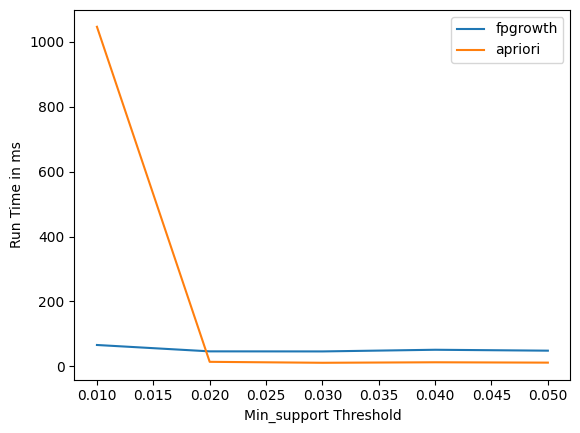

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

![gg.png](attachment:gg.png)